# Machine Learning
- http://faculty.marshall.usc.edu/gareth-james/ISL/
- https://www.statlearning.com/
- https://github.com/JWarmenhoven/ISLR-python
- introduction statistical learning type:pdf
- coffusion matrix
- Introduction to Statistical Laerning (Gareth James)

In [1]:
%pip install scikit-learn
%pip install pydot
%pip install six
# graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import math
import pandas as pd
import numpy as np

from IPython.lib.pretty import pretty
from IPython.display import display, display_html
import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf
from plotly.offline import init_notebook_mode

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing, load_breast_cancer, fetch_openml, make_blobs

%matplotlib --list
# %matplotlib inline
%matplotlib module://matplotlib_inline.backend_inline

# https://discourse.jupyter.org/t/how-to-stop-line-breaks-in-output-of-pandas-dataframes/13875/2
# np.set_printoptions(edgeitems=1000, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))
# np.core.arrayprint._line_width = 100000
pd.set_option('display.max_colwidth', None)  # Or a large number like 1000
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

plt.figure(figsize=(10,7))
sns.set_style('whitegrid')

init_notebook_mode(connected=True)
cf.go_offline()

Available matplotlib backends: ['agg', 'auto', 'cairo', 'gtk3', 'gtk3agg', 'gtk3cairo', 'gtk4', 'gtk4agg', 'gtk4cairo', 'inline', 'macosx', 'nbagg', 'notebook', 'osx', 'pdf', 'pgf', 'ps', 'qt', 'qt5', 'qt5agg', 'qt5cairo', 'qt6', 'qtagg', 'qtcairo', 'svg', 'template', 'tk', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wx', 'wxagg', 'wxcairo']


<Figure size 1000x700 with 0 Axes>

# Linear Regression
- Chapter 2 & 3

In [64]:


df = pd.read_csv('USA_Housing.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.columns)


   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  Avg. Area Number of Bedrooms  Area Population         Price                                               Address
0      79545.458574             5.682861                   7.009188                          4.09     23086.800503  1.059034e+06  208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101
1      79248.642455             6.002900                   6.730821                          3.09     40173.072174  1.505891e+06  188 Johnson Views Suite 079\nLake Kathleen, CA 48958
2      61287.067179             5.865890                   8.512727                          5.13     36882.159400  1.058988e+06   9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489
3      63345.240046             7.188236                   5.586729                          3.26     34310.242831  1.260617e+06                             USS Barnett\nFPO AP 44820
4      59982.197226             5.040555                   7.839388                  

In [49]:


# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]

housing = fetch_california_housing()
# housing = fetch_openml(name="house_prices", as_frame=True)

display(housing.keys())
display(housing['frame'])
display(housing['target_names'])
display(housing['feature_names'])
print(housing['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

None

['MedHouseVal']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

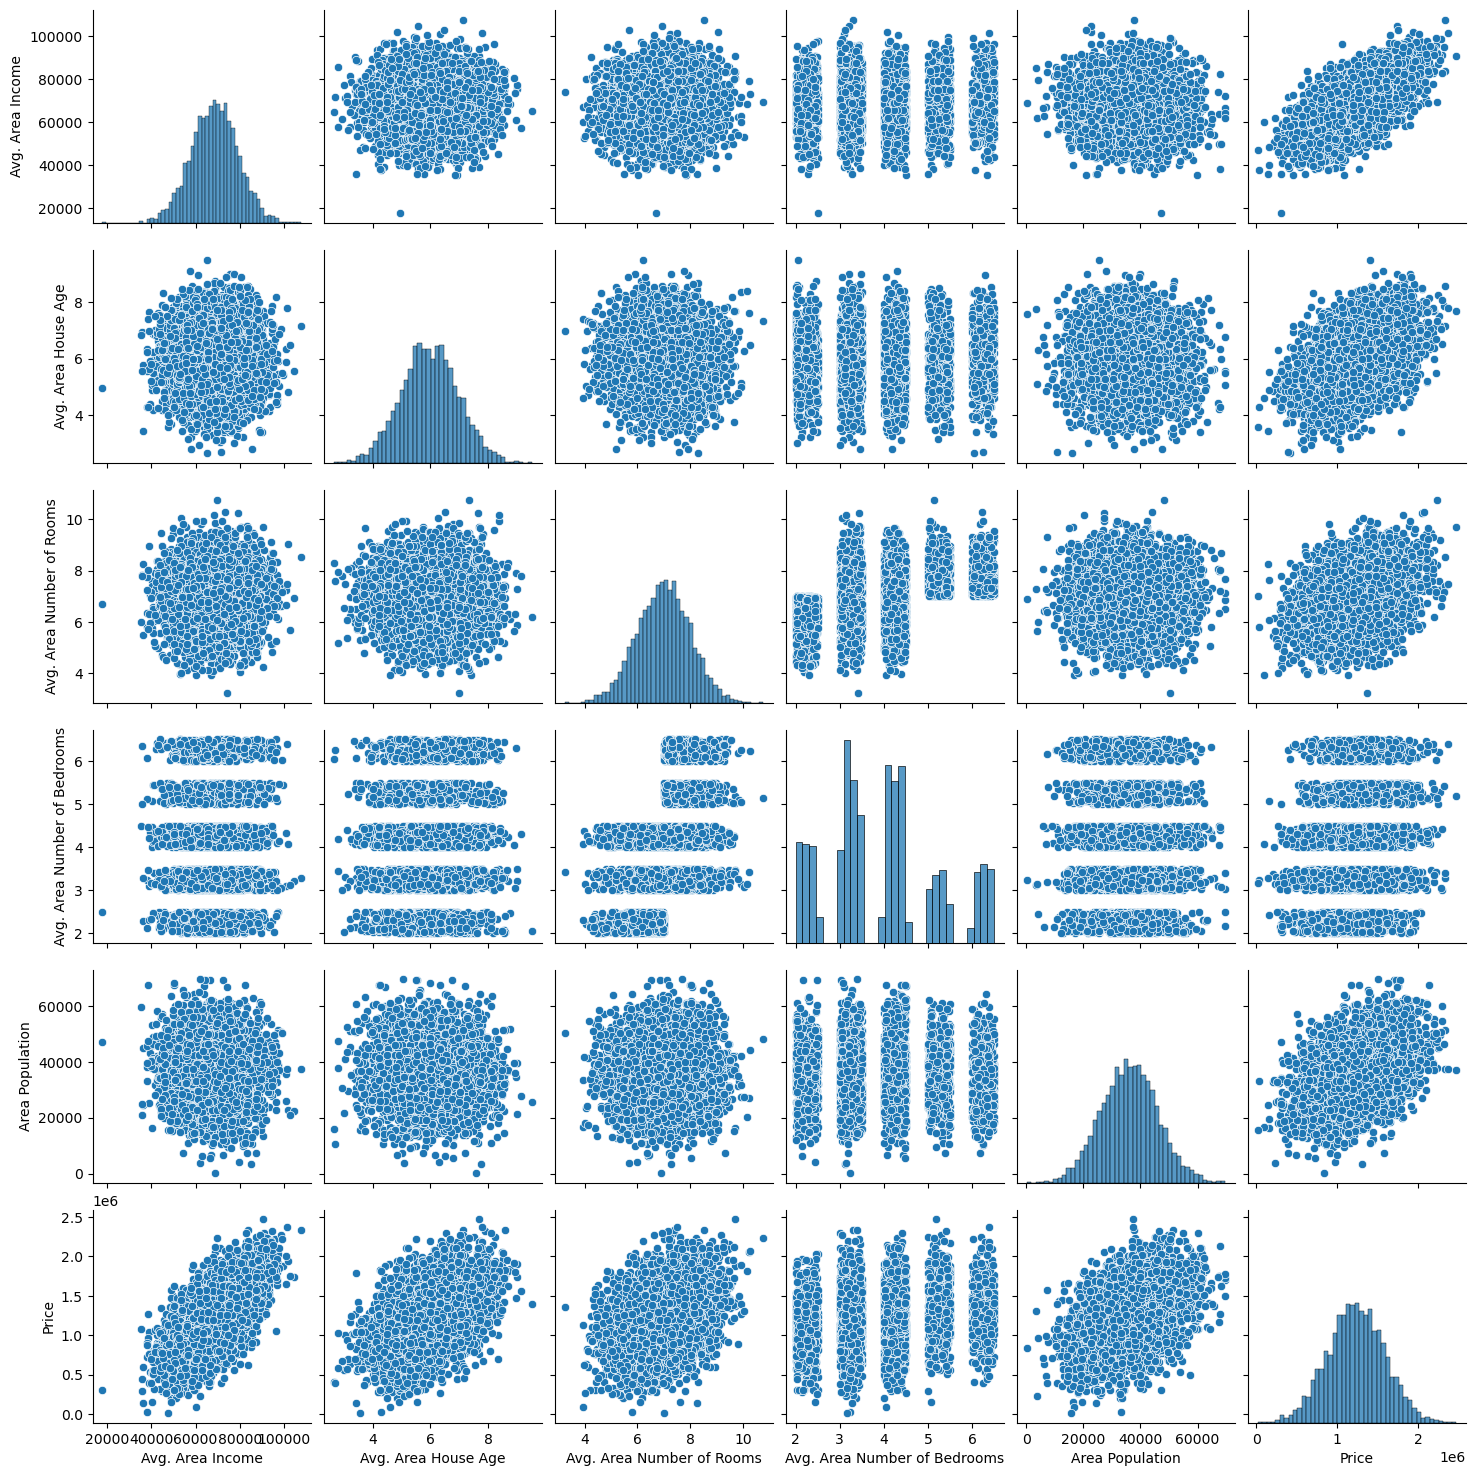

In [4]:
sns.pairplot(df)
plt.show()

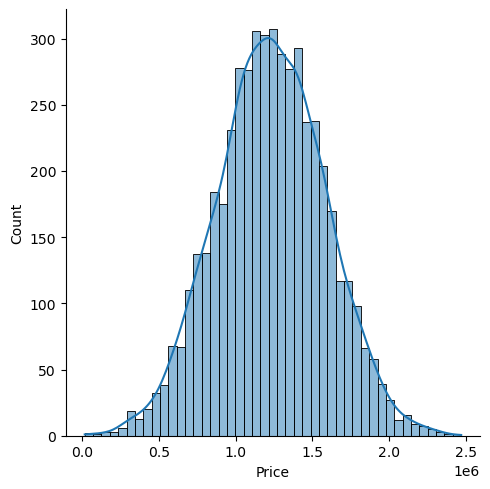

In [8]:
sns.displot(df['Price'], kde=True)
plt.show()

                              Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  Avg. Area Number of Bedrooms  Area Population     Price
Avg. Area Income                      1.000000            -0.002007                  -0.011032                      0.019788        -0.016234  0.639734
Avg. Area House Age                  -0.002007             1.000000                  -0.009428                      0.006149        -0.018743  0.452543
Avg. Area Number of Rooms            -0.011032            -0.009428                   1.000000                      0.462695         0.002040  0.335664
Avg. Area Number of Bedrooms          0.019788             0.006149                   0.462695                      1.000000        -0.022168  0.171071
Area Population                      -0.016234            -0.018743                   0.002040                     -0.022168         1.000000  0.408556
Price                                 0.639734             0.452543                   0.

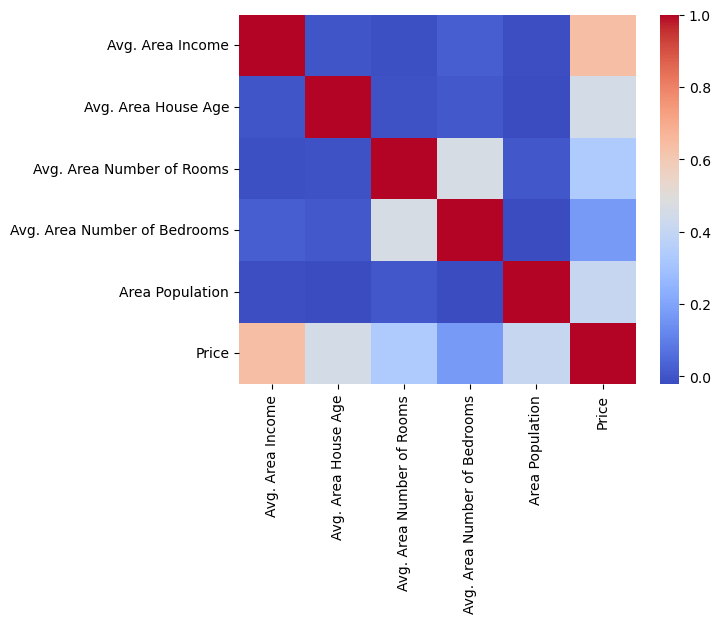

In [ ]:
print(df.corr(numeric_only=True))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.show()

In [27]:
print(df.columns)

X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()
temp = lm.fit(X_train, y_train)
display(temp)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'], dtype='object')


LinearRegression()

In [34]:
display(lm.intercept_)

display(lm.coef_)
display(X_train.columns)

cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
display(cdf)

-2640159.7968519093

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population'], dtype='object')

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

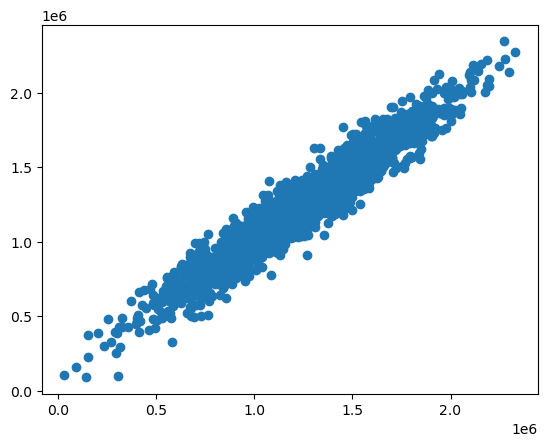

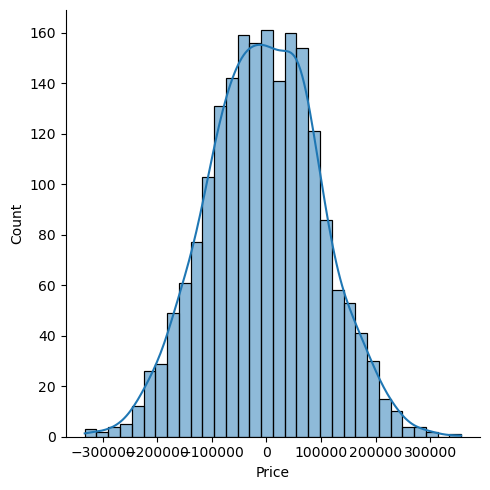

82288.22251914954
10460958907.2095
102278.82922291152


In [66]:
predictions = lm.predict(X_test)
display(predictions)
display(y_test)

plt.scatter(y_test, predictions)
sns.displot((y_test - predictions), kde=True)
plt.show()

print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# Cross Validation and Bias Variance Trade-Off
- Chapter 2
- overfit
- adding noise, more complex
- error for new data

# Logistic Regression
- Sections 4 - 4.3
- (linear) regression = continuous value
- logistic regression
  - classification problem
  - predict discreat categories (0/1)
- transform LiR -> LoR
- Sigmoid (Logistic) FUnction; ret 0..1
- COnfussion Matrix to evaluate classification
- Imputation = filling the gap in data by normalizing (mean) of any data
- Steps: Exploratory, Analysis, and Visualization; Cleaning, ; Training
- Multicollinearity: issue when binary option is correlated

In [7]:
# SibSP = Sibblings / Spouse
# Parch = Parrent, Children
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


   PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket   Fare  Cabin  Embarked
0        False     False   False  False  False  False  False  False   False  False   True     False
1        False     False   False  False  False  False  False  False   False  False  False     False
2        False     False   False  False  False  False  False  False   False  False   True     False
3        False     False   False  False  False  False  False  False   False  False  False     False
4        False     False   False  False  False  False  False  False   False  False   True     False


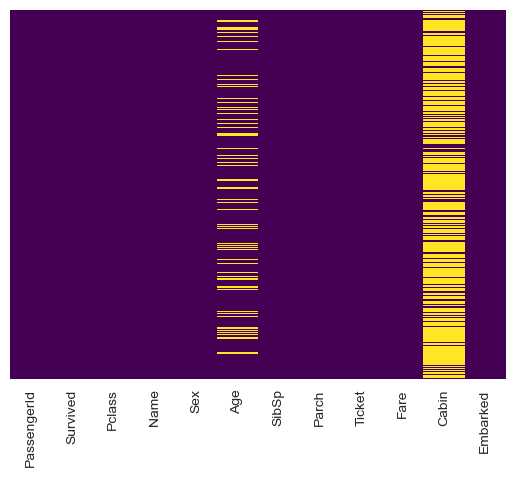

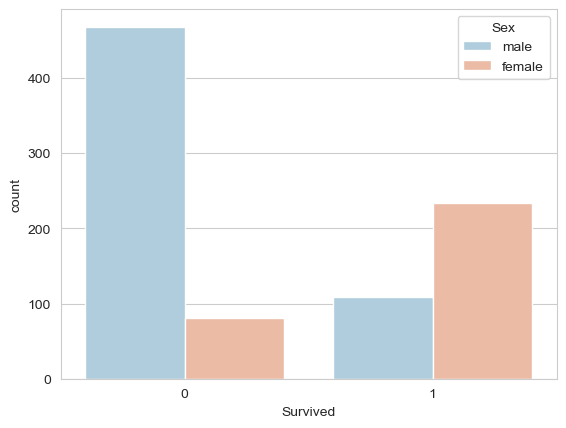

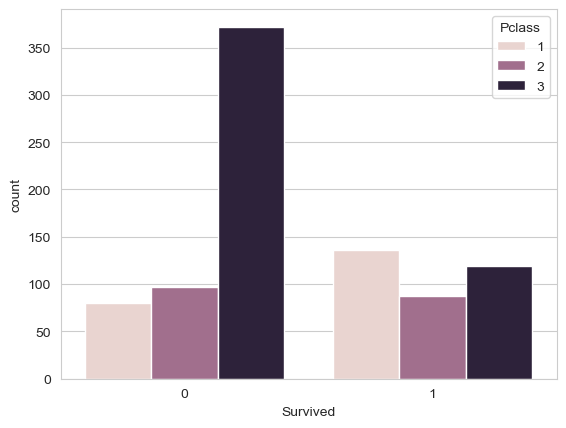

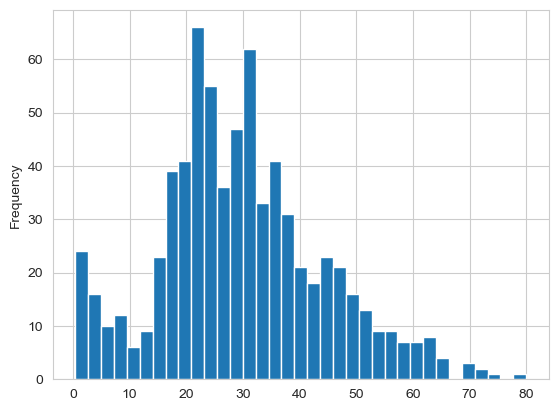

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
print(train.isnull().head())
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()
# Age can be guessed because not much lost
# Cabin is unusable due a lot of not defined

sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')
plt.show()

sns.countplot(x='Survived', data=train, hue='Pclass')
plt.show()

# sns.displot(x=train['Age'].dropna(), kde=False, bins=30)
train['Age'].plot.hist(bins=35)
plt.show()

train['Fare'].iplot(kind='hist',bins=30)

train.info()

38
29
25


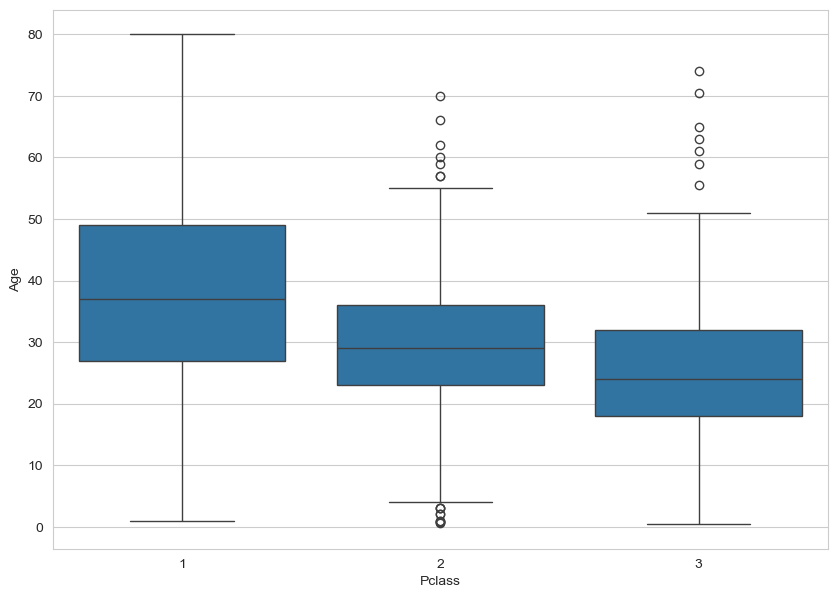

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=train)

print(math.floor(train[ train['Pclass'] == 1 ]['Age'].mean(skipna=True,numeric_only=True)))
print(math.floor(train[ train['Pclass'] == 2 ]['Age'].mean(skipna=True,numeric_only=True)))
print(math.floor(train[ train['Pclass'] == 3 ]['Age'].mean(skipna=True,numeric_only=True)))

In [50]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

C:\Users\farha\AppData\Local\Temp\ipykernel_12504\1326723614.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\farha\AppData\Local\Temp\ipykernel_12504\1326723614.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

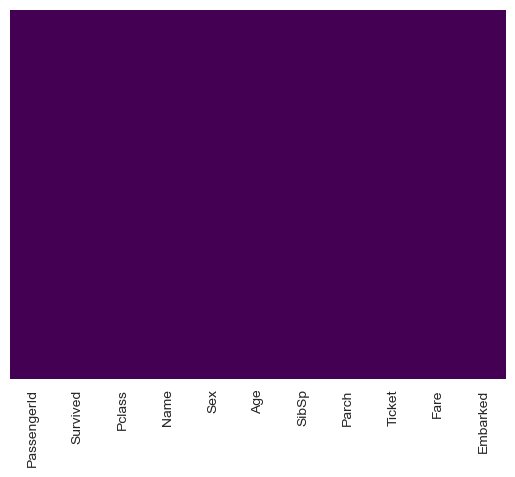

In [53]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [52]:
train.drop('Cabin', axis=1, inplace=True)
# train.dropna(inplace=True)

In [57]:
display(pd.get_dummies(train['Sex']).head()) # Multicollinearity

sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

# pd.concat([train, male, embark], axis=1)
# train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
# train.drop('PassengerId', axis=1, inplace=True)

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


,male
0,True
1,False
2,False
3,False
4,True


# K Nearest Neighbors
- Chapter 4
- KNN -> Classification
- Best on unknown data
- Not good on high dimensional data
- https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

In [2]:
df = pd.read_csv('Classified Data', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [14]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))
sf = scaler.transform(df.drop('TARGET CLASS', axis=1))
df_f = pd.DataFrame(sf, columns=df.columns[:-1])
df_f

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [16]:
X = sf
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [19]:
error_rate = []

for i in range (1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[153   6]
 [  9 132]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



Text(0, 0.5, 'Error Rate')

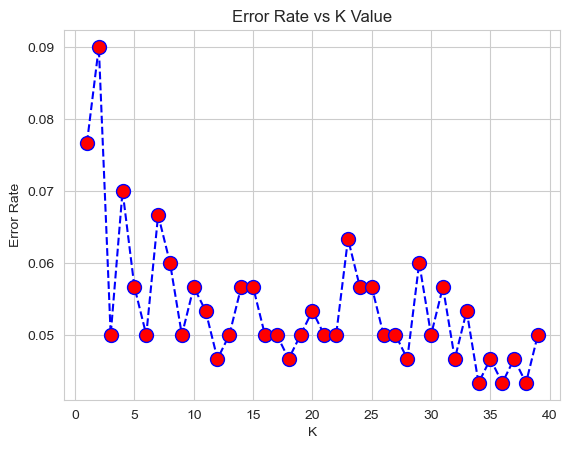

In [18]:
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Decision Tree and Random Forest
- Chapter 8 - Introduction of Statistical Learning
- Variety Factor
- Entropy and Information Gain
- DT vs RF?
- http://stats.stackexchange.com/questions/36165/does-the-optimal-number-of-trees-in-a-random-forest-depend-on-the-number-of-pred

In [3]:
df = pd.read_csv("kyphosis.csv")
display(df.head())
display(df.info())

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


None

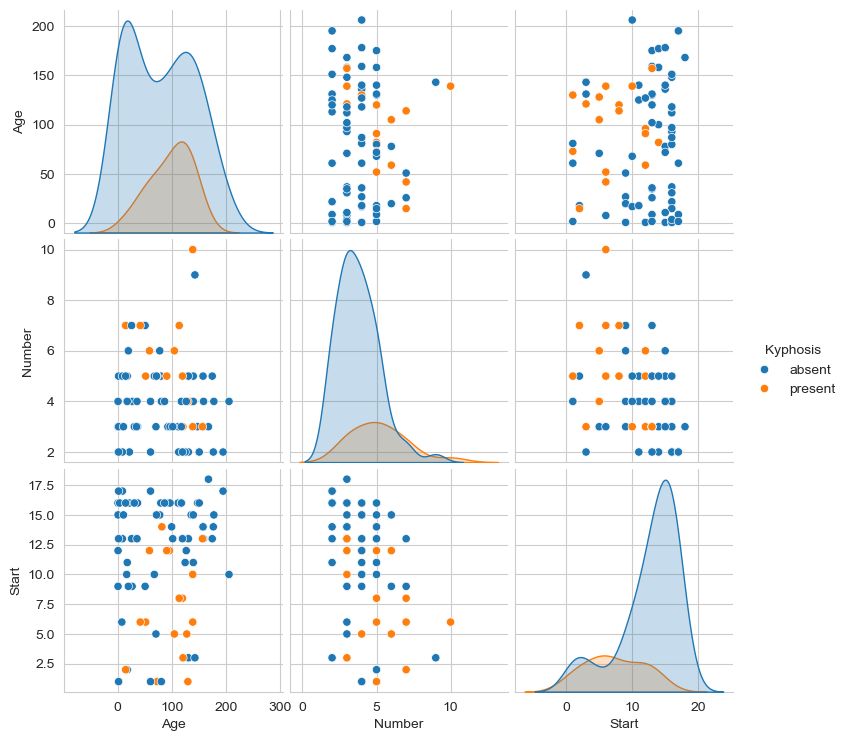

In [4]:
sns.pairplot(df, hue='Kyphosis')

In [7]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [9]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_predict = dtree.predict(X_test)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[14  5]
 [ 2  4]]
              precision    recall  f1-score   support

      absent       0.88      0.74      0.80        19
     present       0.44      0.67      0.53         6

    accuracy                           0.72        25
   macro avg       0.66      0.70      0.67        25
weighted avg       0.77      0.72      0.74        25



In [78]:
df.shape

(81, 4)

In [77]:
# rfc = RandomForestClassifier(n_estimators=200)
# rfc = RandomForestClassifier(n_estimators=df.index.size * 4)
# rfc = RandomForestClassifier(n_estimators=df.columns.size * 4)
rfc = RandomForestClassifier(n_estimators=df.columns.size * df.index.size)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[16  3]
 [ 3  3]]
              precision    recall  f1-score   support

      absent       0.84      0.84      0.84        19
     present       0.50      0.50      0.50         6

    accuracy                           0.76        25
   macro avg       0.67      0.67      0.67        25
weighted avg       0.76      0.76      0.76        25



# Support Vector Machine
- Chapter 9 - Introducion to Statistical Learning
- assosicated learning algo
- analyze data, recog pattern
- classofocation, regression analy
- 2 seperate points in space
- hyperplane
- support vector -> touch and mark the line
- non-lineraly separable data, kernel trick
- tune model with GridSearch
- C controls cost misclasification; large = low bias, high variance; penalize the cost of misclassification
- gamma -> free parameter of Gaussian ratio basis function; small gamma = gaussian large varian; large gamma = high bias low variance
- gamma large = variance small = support vector does not have a widespread influence

In [17]:
cancer = load_breast_cancer()
display(cancer.keys())
display(cancer['feature_names'])
display(cancer['target_names'])
display(cancer['target'])
print(cancer['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

array(['malignant', 'benign'], dtype='<U9')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [16]:
df_feats = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
display(df_feats.head())
display(df_feats.info())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

None

In [18]:
X = df_feats
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
model = SVC(gamma='auto', verbose=True, ) # default in newer version: scale
display(model.fit(X_train, y_train))
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LibSVM]

SVC(gamma='auto', verbose=True)

[[  0  66]
 [  0 105]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.61      1.00      0.76       105

    accuracy                           0.61       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.38      0.61      0.47       171



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [40]:
param_grid = {
    'C':     [0.1,   1,   10,   100,  10000],
    'gamma': [1,   0.1, 0.01, 0.001, 0.0001]
}
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, refit=True, verbose=3)
display(grid.fit(X_train, y_train))

display(grid.best_params_)
display(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.637 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

{'C': 1, 'gamma': 0.0001}

SVC(C=1, gamma=0.0001)

In [41]:
# y_grid = grid.best_estimator_.predict()
y_grid = grid.predict(X_test)

print(confusion_matrix(y_test, y_grid))
print(classification_report(y_test, y_grid))

[[ 59   7]
 [  4 101]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



# K Means Clustering
- CHapter 10 - Introduction to Statistical Learning
- Unsuverviesed, unlabled, group similar cluster,
- base feature, segmentation trying identify
- divide data, distinct groups, similarity
- large colored disk
- elbow method

2

(200, 2)

(200,)

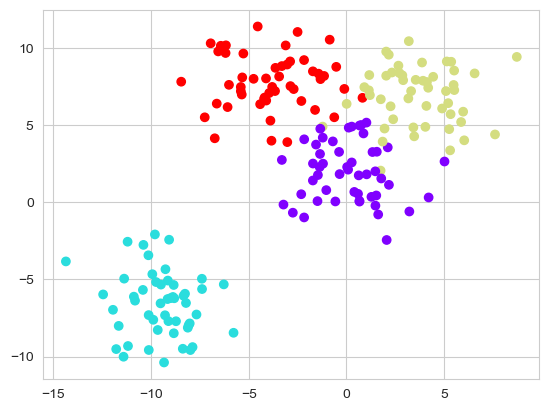

In [54]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)
display(len(data))
display(data[0].shape)
display(data[1].shape)

plt.scatter(data[0][:, 0], data[0][:, 1], c=data[1], cmap='rainbow')

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=4)

array([[ 3.71749226,  7.01388735],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851],
       [-0.0123077 ,  2.13407664]])

array([2, 0, 3, 0, 0, 1, 0, 3, 0, 3, 2, 3, 0, 0, 2, 3, 0, 3, 1, 2, 1, 3,
       3, 1, 2, 1, 1, 3, 0, 0, 2, 1, 0, 3, 3, 2, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 0, 2, 3, 1, 3, 3, 2, 0, 3, 1, 2, 3, 3, 2, 0, 1, 0, 1, 2, 0, 3,
       1, 0, 0, 1, 0, 3, 1, 3, 1, 0, 0, 3, 2, 3, 3, 1, 0, 1, 3, 3, 3, 2,
       3, 1, 1, 1, 1, 3, 3, 1, 0, 2, 1, 0, 3, 1, 3, 3, 0, 3, 1, 0, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 0, 2, 3, 1, 2, 2, 2,
       3, 1, 1, 2, 0, 2, 0, 3, 1, 0, 1, 2, 2, 0, 3, 1, 2, 2, 2, 2, 3, 0,
       3, 2, 0, 0, 0, 3, 0, 3, 3, 2, 1, 2, 3, 0, 2, 3, 0, 3, 2, 0, 3, 2,
       0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 0, 0, 2, 1, 3, 0, 0,
       1, 3])

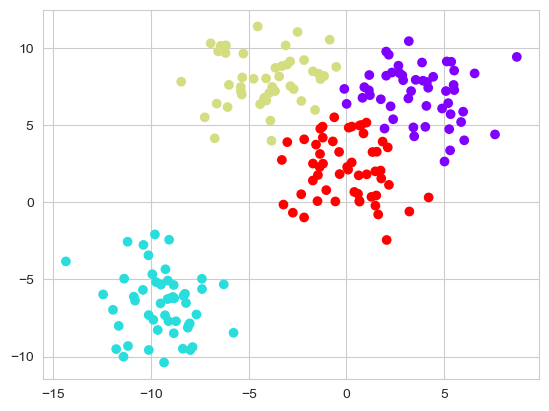

In [59]:
kmeans = KMeans(n_clusters=4Pierian Trainingddddsssddddd
                dss)
display(kmeans.fit(data[0]))
display(kmeans.cluster_centers_)
display(kmeans.labels_)

plt.scatter(data[0][:, 0], data[0][:, 1], c=kmeans.labels_, cmap='rainbow')

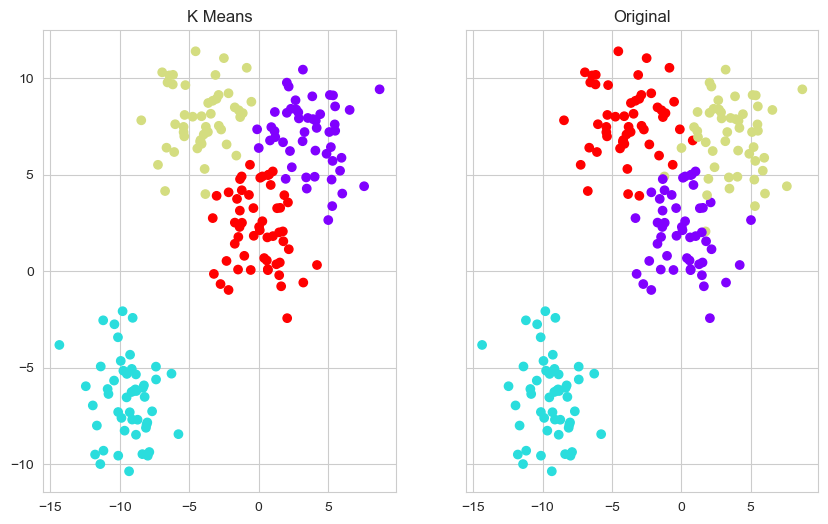

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(data[0][:, 0], data[0][:, 1], c=kmeans.labels_, cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(data[0][:, 0], data[0][:, 1], c=data[1], cmap='rainbow')

# Principal Component Analysis
- Section 10.2 - Introduction to Statistical Learning
- Unsupervised Statistical Technique, examine,
  - interrelations, a set of variables, 
  - identify structure var
- general factor analysis, best fit of orth lines
- orthogonal lines = at right angles, perpendicular
- n-dims = var sample space; 4 var = 4D
- orth lines -> cut regr lines/principal comp
- components = linear transf, chose 1 var sys, great variac, 
- intepr comp
- standz by scale
- pca only use for anly, not deploy

# Recommender Systems
- Recommender System by Jannach and Zanker
- extremly complex, resource intensive
- Content based, collaborative filtering
- collaborative filtering
  - Memory-base using computing cosine similarity
  - Model-base using single value decomposition
- 

In [ ]:
df.pivot_table(index="", columns="", values="")
df.corrwith